
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

In [2]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for graphic representations
from matplotlib import pyplot as plt # used for visualization
import pylab # used for visualizing
import pingouin as pg # used for hypothesis testing

df_mh = pd.read_csv(r'C:\Users\Administrator\Desktop\data for A1\MillerHadenData.csv')



**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [4]:
# Q1a (code):
# Display first few rows of the dataframe

print(df_mh.head())

# Check data types and information
print(df_mh.info())


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [5]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables

participants_reading_ability = set(df_mh['Abil'])
participants_iq = set(df_mh['IQ'])

if participants_reading_ability == participants_iq: 
    print("There is a data point for both variables.")
else:
    print("Some data are missing on either 'Abil' or 'IQ'.")

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Some data are missing on either 'Abil' or 'IQ'.


In [6]:
# Q1c (code):
# Check data distribution
from scipy.stats import shapiro

abil_data = df_mh['Abil']
iq_data = df_mh['IQ']

_, p_value_abil = shapiro(abil_data)
_, p_value_iq = shapiro(iq_data)

alpha = 0.05

if p_value_abil > alpha:
    print("Abil data is normally distributed")
else:
    print("Abil data is not normally distributed")

if p_value_iq > alpha:
    print("IQ data is normally distributed")
else:
    print("IQ data is not normally distributed")

Abil data is normally distributed
IQ data is normally distributed


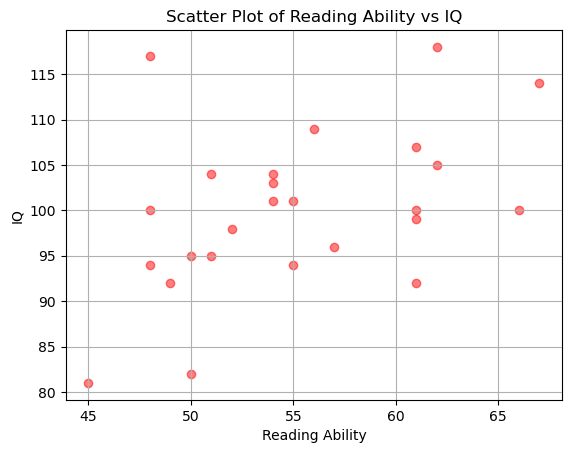

In [7]:
# Q1d (code):
# Scatter plot
reading_ability = df_mh['Abil']
iq = df_mh['IQ']

plt.scatter(reading_ability, iq, color='r', alpha=0.5)
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.title('Scatter Plot of Reading Ability vs IQ')

plt.grid(True)
plt.show()

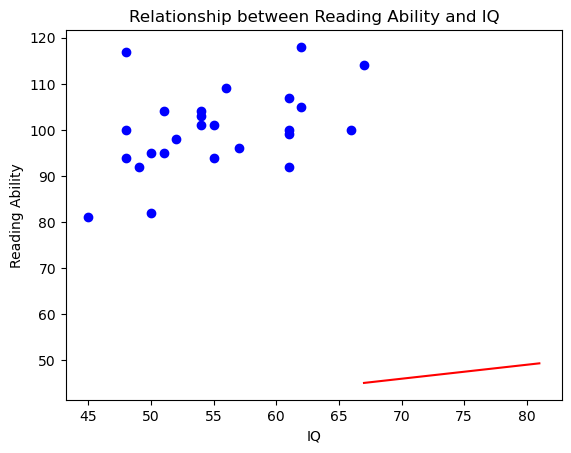

In [13]:
# Q1e (code):
# Correlation line
import numpy as np
reading_ability = df_mh['Abil']
iq = df_mh['IQ']

plt.scatter(reading_ability, iq, color='blue') #scatter plot
correlation_coefficient = iq.corr(reading_ability)

slope = correlation_coefficient * (reading_ability.std() / iq.std()) #calculate
intercept = reading_ability.mean() - slope * iq.mean()

x_values = np.array([min(iq), max(reading_ability)])
y_values = slope * x_values + intercept

plt.plot(x_values, y_values, color='r', label='Correlation line')
plt.xlabel('IQ')
plt.ylabel('Reading Ability')
plt.title('Relationship between Reading Ability and IQ')
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [ ]:
# Q2a (answer with words):

#Pearson will be mor suitable bcuz both Abil and IQ data are normally distributed and there's a linear relationship between them.

In [16]:
# Q2b (code):
correlation_coefficient = iq.corr(reading_ability)
print(f"Correlation Coefficient between IQ and Abil:, {correlation_coefficient}")


Correlation Coefficient between IQ and Abil:, 0.4511699387650761


In [ ]:
# Q2c (answer with words):
#There does exist a positive relation between IQ and Reading ability, but coefficient 0.451 means not a strong relation but still exist. People with higher IQ perhaps have better reading ability, but it is not with absolute certainty.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [ ]:
# Q3a (answer in words):
# H0: There is not a significant relationship between reading abilty and the amount of time sependiing at home per week.
# H1：There is a significant relationship between reading abilty and the amount of time sependiing at home per week.

In [18]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##used for chi-square test

# Define the rounded average for Reading Ability and Home
avg_abil = df_mh['Abil'].mean() #for abil
rounded_avg_abil = round(avg_abil)

avg_home = df_mh['Home'].mean() #for home
rounded_avg_home = round(avg_home)

# Create the Rank_Abil column
df_mh['Rank_Abil'] = ['Low' if abil <= rounded_avg_abil else 'High' for abil in df_mh['Abil']]

# Create the Rank_Home column
df_mh['Rank_Home'] = ['Infrequent' if home <= rounded_avg_home else 'Frequent' for home in df_mh['Home']]

print(df_mh.head()) #to check

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      High    Frequent
1            2    56  109   123  608      High  Infrequent
2            3    45   81   108  640       Low  Infrequent
3            4    66  100   155  493      High    Frequent
4            5    49   92   103  636       Low  Infrequent


In [19]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

print("Contingency Matrix:")
print(contingency_matrix)

Contingency Matrix:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [20]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of Freedom: 1
Expected Frequencies:
[[4.4 5.6]
 [6.6 8.4]]


In [ ]:
# Q3e (answer in words):
# The chi-square stats is 6.5, p-value is 0.011 (<0.05), the degree of the freedom is 1, and Expected Frequencies [4.4 5.6][6.6 8.4],it proves H1: There is a significant relationship between reading abilty and the amount of time sependiing at home per week.  

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [21]:

import pandas as pd # used for data wrangling
from scipy import stats #for hypothesis testing
import numpy as np #for data analysis
import matplotlib.pyplot as plt ##for visualization
import seaborn as sns #for visualization

# Load the data
df_evaluators = pd.read_csv(r"C:\Users\Administrator\Desktop\data for A1\evaluators.csv")
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [22]:
# Q4a (code):
# Calculate mean and standard deviation for age
age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()

print("Mean age of evaluators:", age_mean)
print("Standard deviation of age of evaluators:", age_std)

Mean age of evaluators: 30.852941176470587
Standard deviation of age of evaluators: 6.238358141327351


In [23]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = (df_evaluators['sex'] == 1.0).sum()
female_count = (df_evaluators['sex'] == 2.0).sum()

print("Number of Male Evaluators:", male_count)
print("Number of Female Evaluators:", female_count)

Number of Male Evaluators: 4
Number of Female Evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [24]:
# Load ratings data
df_ratings = pd.read_csv(r"C:\Users\Administrator\Desktop\data for A1\ratings.csv")
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [48]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_cate = ['thoughtful', 'competent', 'intelligent']
filtered_df = df_ratings[df_ratings['Category'].isin(filtered_cate)]

                         
# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_ratings = df_ratings[df_ratings['Category'] == 'intelligent']
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows

intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
impression_hire_df = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
ratings2 = pd.concat([filtered_df, intellect_mean, impression_hire_df], ignore_index=True)

# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
combined_ratings = pd.concat([intellect_mean, ratings2], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
merged_df = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
selected_df = merged_df[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = selected_df.sort_values(by=['eval_id', 'Category'])


# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
0,1,competent,6.0,listened
157,1,hire,6.0,listened
156,1,impression,7.0,listened
117,1,intellect,6.0,listened
2,1,intelligent,6.0,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [ ]:
# Q6a (answer in words):
# Null hypothesis: There's not a significant relationship of evaluators overall rating between who listened to pitches and who read pitches.

# Alternative hypothesis: There's a significant relationship of evaluators overall rating between who listened to pitches and who read pitches.


# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

#Choose two-tail bcuz we need to test whether there's a significant relationship between two sets of data or not, and we don't know the direction of differences yet.

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

#Independent Variable- The way of how present pitches,listening or reading.
#Dependent Variable- The evaluators overall ratings.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [60]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analyse

# Descriptive analysis of the ratings
print("ratings_desc")
print(ratings2.groupby('Category')['Rating'].describe())

# Test for normal distribution (Shapiro-Wilk test)
categories = ['intellect', 'impression', 'hire']
for category in categories:
    data_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    data_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    
_, p_shapiro_listened = shapiro(data_listened)
_, p_shapiro_read = shapiro(data_read)

# Test for homogeneity of variances (Levene's test)
_, p_levene = levene(data_listened, data_read)

# Independent t-tests
for category in categories:
    data_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    data_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
_, p_ttest = ttest_ind(data_listened, data_read)


print(f"shapiro test for listen: p-value = {p_shapiro_listened:.4f}")
print(f"shapiro test for read: p-value = {p_shapiro_read:.4f}")
print(f"levene_results: p-value = {p_levene:.4f}")
print(f"Independent t-test p-value = {p_ttest:.4f}")



ratings_desc
             count      mean       std       min       25%       50%  75%  \
Category                                                                    
competent     39.0  4.769231  2.083286  1.000000  3.000000  5.000000  6.0   
hire          39.0  3.871795  2.330343  0.000000  2.000000  4.000000  5.0   
impression    39.0  5.094017  2.254234  0.333333  3.666667  5.333333  7.0   
intellect     39.0  4.487179  2.063107  0.000000  3.000000  5.000000  5.5   
intelligent   39.0  4.487179  2.063107  0.000000  3.000000  5.000000  5.5   
thoughtful    39.0  4.897436  2.325996  0.000000  3.000000  5.000000  7.0   

                  max  
Category               
competent    9.000000  
hire         8.000000  
impression   8.666667  
intellect    9.000000  
intelligent  9.000000  
thoughtful   9.000000  
shapiro test for listen: p-value = 0.2088
shapiro test for read: p-value = 0.0660
levene_results: p-value = 0.7458
Independent t-test p-value = 0.0127


In [ ]:
#Q7b (answer in words):
# 1. ratings desc shows ratings for each category, columns include the count, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and maximum
# 2. shapiro test result indicates that data are normally distributed (>0.05)
# 3. levenue result >0.05 means we fail to reject the null hypothesis of equal variances
# 4. independent t test< 0.05 indicates there's a significant difference in ratings between the 'listen' and 'read' conditions for the 'hire' category